# 第二章 &nbsp; &nbsp; 自然语言与单词分布式表示
接下来，我们将踏入自然语言处理的世界。自然语言处理涉及多个子领域，但是它们的根本任务都是让计算机理解我们的语言。何谓让计算机理解我们的语言？存在哪些方法？本章我们将以这些问题为中心展开讨论。为此，我们将先详细考察古典方法，即深度学习出现以前的方法。从下一章开始，再介绍基于深度学习（确切地说，是神经网络）的方法。

本章我们还会练习使用 Python 处理文本，实现分词（将文本分割成单词）和单词 ID 化（将单词转换为单词 ID）等任务。本章实现的函数在后面的章节中也会用到。因此，本章也可以说是后续文本处理的准备工作。那么，让我们一起进入自然语言处理的世界吧。

## 什么是自然语言处理
我们平常使用的语言，如日语或英语，称为**自然语言**（natural language）。所谓**自然语言处理**（Natural Language Processing，NLP），顾名思义，就是处理自然语言的科学。简单地说，它是一种能够让计算机理解人类语言的技术。换言之，自然语言处理的目标就是让计算机理解人说的话，进而完成对我们有帮助的事情。

另外，说到计算机可以理解的语言，我们可能会想到编程语言或者标记语言等。这些语言的语法定义可以唯一性地解释代码含义，计算机也能根据确定的规则分析代码。

众所周知，编程语言是一种机械的、缺乏活力的语言。换句话说，它是一种“硬语言”。而英语或日语等自然语言是“软语言”。这里的“软”是指意思和形式会灵活变化，比如含义相同的文章可以有不同的表述，或者文章存在歧义，等等。另外，自然语言的“软”还体现在，新的词语或新的含义会随着时代的发展不断出现。

自然语言是活着的语言，具有“柔软性”。因此，要让“头脑僵硬”的计算机去理解自然语言，使用常规方法是无法办到的。但是，如果我们能办到，就能让计算机去完成一些对人们有用的事情。事实上，我们可以看到很多这样的应用。搜索引擎和机器翻译就是两个比较好理解的例子，除此之外，还有问答系统、假名汉字转化（IME）、自动文本摘要和情感分析等，在我们身边已经使用了很多自然语言处理技术。

### 单词含义
我们的语言是由文字构成的，而语言的含义是由单词构成的。换句话说，单词是含义的最小单位。因此，为了让计算机理解自然语言，让它理解单词含义可以说是最重要的事情了。

本章的主题是让计算机理解单词含义。确切地说，我们将探讨一些巧妙地蕴含了单词含义的表示方法。具体来说，本章和下一章将讨论以下 3 种方法。

- 基于同义词词典的方法 
- 基于计数的方法 
- 基于推理的方法（word2vec） 

首先，我们将简单介绍一下使用人工整理好的同义词词典的方法。然后，对利用统计信息表示单词的方法（这里称为“基于计数的方法”）进行说明。这些都是本章学习的内容。在下一章，我们将讨论利用神经网络的基于推理的方法（具体来说，就是 word2vec 方法）。本章的结构参考了斯坦福大学课程 “CS224d: Deep Learning for Natural Language Processing” 。

## 同义词词典
要表示单词含义，首先可以考虑通过人工方式来定义单词含义。一种方法是像《新华字典》那样，一个词一个词地说明单词含义。比如，当你用字典查“汽车”这个单词时，就会看到“装有车轮并依靠它们前行的交通工具或运输工具……”这样的说明。通过像这样定义单词，计算机或许也能够理解单词含义。

回顾自然语言处理的历史，人们已经尝试过很多次类似这样的人工定义单词含义的活动。但是，目前被广泛使用的并不是《新华字典》那样的常规词典，而是一种被称为**同义词词典**（thesaurus）的词典。在同义词词典中，具有相同含义的单词（同义词）或含义类似的单词（近义词）被归类到同一个组中。比如，使用同义词词典，我们可以知道 car 的同义词有 automobile、motorcar 等。

<img src="./fig/thesaurus_example.png" alt="thesaurus_example" style="display: block; margin: 0 auto;">

另外，在自然语言处理中用到的同义词词典有时会定义单词之间的粒度更细的关系，比如“上位 - 下位”关系、“整体 - 部分”关系。举个例子，如下图所示，我们利用图结构定义了各个单词之间的关系。

<img src="./fig/thesaurus_connection.png" alt="thesaurus_connection" style="display: block; margin: 0 auto;">

在图中，单词 motor vehicle（机动车）是单词 car 的上位概念。car 的下位概念有 SUV、compact 和 hatch-back 等更加具体的车种。

像这样，通过对所有单词创建近义词集合，并用图表示各个单词的关系，可以定义单词之间的联系。利用这个“单词网络”，可以教会计算机单词之间的相关性。也就是说，我们可以将单词含义（间接地）教给计算机，然后利用这一知识，就能让计算机做一些对我们有用的事情。

如何使用同义词词典根据自然语言处理的具体应用的不同而不同。比如，在信息检索场景中，如果事先知道 automobile 和 car 是近义词，就可以将 automobile 的检索结果添加到 car 的检索结果中。

## WordNet
在自然语言处理领域，最著名的同义词词典是 WordNet。WordNet是普林斯顿大学于 1985 年开始开发的同义词词典，迄今已用于许多研究，并活跃于各种自然语言处理应用中。

使用 WordNet，可以获得单词的近义词，或者利用单词网络。使用单词网络，可以计算单词之间的相似度。这里，我们不对 WordNet 进行详细说明。

---

WordNet 是一个由美国普林斯顿大学认知科学实验室开发的**英语词汇语义数据库**，核心功能是通过“语义关联”而非传统词典的字母顺序，组织和描述英语词汇的含义、关系及用法，本质上是一座连接词汇与概念的“语义网络”。它自1985年启动开发，目前已成为自然语言处理（NLP）、人工智能、语言学研究等领域的基础工具之一。


### 一、WordNet 的核心设计理念：“概念优先，词汇依附”
WordNet 的核心逻辑是：**先定义“概念”（即“同义词集合”），再将表达该概念的所有词汇（同义词）归为一类**，最后用“语义关系”串联不同概念，形成结构化的语义体系。

#### 1. 核心单元：Synset（同义词集合）
Synset（全称 Synonym Set，同义词集合）是 WordNet 的最小语义单位，代表一个“独立的概念”。每个 Synset 包含：
- **一组同义词**：这些词在特定语境下表达完全相同或高度相近的含义。  
  例如，表达“‘犬科动物’这一概念”的 Synset 包含：`dog, domestic dog, Canis familiaris`；  
  表达“‘行走’这一动作概念”的 Synset 包含：`walk, step`（特定语境下）。
- **简短定义（Gloss）**：解释该概念的含义，类似词典释义，避免歧义。  
  例如上述“dog”的 Synset 定义为：“a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds”。
- **例句（Example）**：部分 Synset 会附带例句，说明概念的实际用法。  
  例如“walk”的 Synset 例句：“She walks to work every day”。


### 二、WordNet 的核心语义关系：串联概念的“网络”
WordNet 的价值在于用明确的“语义关系”连接不同 Synset（概念），让词汇不再是孤立的条目，而是形成可追溯、可推理的语义网络。主要关系分为几大类：

#### 1. 词汇内关系（同一词类的概念关联）
针对名词、动词、形容词、副词这四大词类（WordNet 主要收录这四类词），分别定义了专属关系，其中**名词和动词的关系最丰富**：

| 词类 | 核心语义关系 | 举例 |
|------|--------------|------|
| **名词** | 1. **上下位关系（Hyponymy/Hypernymy）**：“子类-父类”关系（如“金毛”是“狗”的下位词，“狗”是“哺乳动物”的下位词）<br>2. **部分-整体关系（Meronymy/Holonymy）**：“部分”与“整体”的关联（如“车轮”是“汽车”的部分词，“叶子”是“树”的部分词）<br>3. **属性关系（Attribute）**：概念的典型特征（如“红色”是“苹果”的属性，“忠诚”是“狗”的属性） | 下位词：`golden retriever` → `dog` → `mammal` <br>部分词：`wheel` → `car` |
| **动词** | 1. **蕴含关系（Entailment）**：一个动作必然包含另一个动作（如“吃”蕴含“咀嚼”，“跑”蕴含“移动”）<br>2. **上下位关系（Troponymy）**：“具体动作”与“抽象动作”的关联（如“慢跑”是“跑”的下位动作，“低语”是“说”的下位动作）<br>3. **反义关系（Antonymy）**：动作的相反含义（如“买”与“卖”，“来”与“去”） | 蕴含：`eat` → `chew` <br>下位动作：`jog` → `run` |
| **形容词/副词** | 1. **反义关系（Antonymy）**：最核心关系（如“大”与“小”，“快”与“慢”）<br>2. **程度关系（Gradation）**：同一维度的程度差异（如“温暖”→“炎热”，“冷”→“寒冷”） | 反义：`hot` ↔ `cold` <br>程度：`warm` < `hot` |

#### 2. 词汇间关系（跨词类的概念关联）
主要是“派生关系（Derivation）”：由同一词根派生的不同词类（如“danger”（名词）与“dangerous”（形容词），“teach”（动词）与“teacher”（名词）），WordNet 会标注这种词根关联。


### 三、WordNet 的特点与优势
1. **语义结构化**：突破传统词典的“线性排序”，用网络呈现词汇的语义关联，便于计算机理解“词汇背后的概念”（例如，机器可通过“下位关系”推断“金毛能做的事，狗大概率也能做”）。  
2. **多义性区分**：同一词汇的不同含义会被归入不同 Synset（例如“bank”可表示“银行”或“河岸”，对应两个完全独立的 Synset，避免歧义）。  
3. **开放性与可扩展**：作为开源资源（非商业用途免费），研究者可基于其框架补充新词汇、新语义关系，适配语言的动态变化。  
4. **跨领域适配**：不仅用于语言学研究，还能支撑机器翻译（如通过语义关系匹配多语言概念）、信息检索（如“搜索‘犬’时，自动关联‘狗’‘宠物’等近义词”）、情感分析（如通过形容词反义关系判断情感倾向）等场景。


### 四、WordNet 的应用场景
1. **自然语言处理（NLP）**：  
   - 词义消歧（如判断“bank”在“go to the bank”中是“银行”还是“河岸”）；  
   - 文本相似度计算（如通过比较两个句子中词汇的语义关联度，判断文本是否同义）；  
   - 问答系统（如用户问“什么动物会汪汪叫”，机器通过“狗”的 Synset 属性关联答案）。  
2. **语言学研究**：  
   - 分析词汇的语义演变（如“mouse”从“老鼠”延伸出“鼠标”的新 Synset）；  
   - 构建语义地图，研究人类对概念的认知逻辑。  
3. **教育与工具开发**：  
   - 开发智能词典（如向学习者展示词汇的同义词、上下位词，帮助扩展词汇量）；  
   - 辅助写作（如推荐同义替换词，避免重复）。


### 五、WordNet 的衍生与扩展
由于 WordNet 最初仅支持英语，后来全球研究者基于其理念开发了多语言版本，形成“WordNet 家族”，例如：
- 中文：**知网（HowNet）**（虽设计理念略有差异，但核心是“语义关联”）、**中文 WordNet**（直接对标英语 WordNet 的中文语义库）；  
- 其他语言：日语 WordNet、法语 WordNet 等。


总之，WordNet 不仅是一部“智能词典”，更是一套描述“人类语言语义逻辑”的结构化体系，为机器理解自然语言提供了关键的“语义桥梁”。

---

## 基于计数的方法
从介绍基于计数的方法开始，我们将使用**语料库**（corpus）。简而言之，语料库就是大量的文本数据。不过，语料库并不是胡乱收集数据，一般收集的都是用于自然语言处理研究和应用的文本数据。

说到底，语料库只是一些文本数据而已。不过，其中的文章都是由人写出来的。换句话说，语料库中包含了大量的关于自然语言的实践知识，即文章的写作方法、单词的选择方法和单词含义等。基于计数的方法的目标就是从这些富有实践知识的语料库中，自动且高效地提取本质。

自然语言处理领域中使用的语料库有时会给文本数据添加额外的信息。比如，可以给文本数据的各个单词标记词性。在这种情况下，为了方便计算机处理，语料库通常会被结构化（比如，采用树结构等数据形式）。这里，假定我们使用的语料库没有添加标签，而是作为一个大的文本文件，只包含简单的文本数据。

### 基于Python的语料库的预处理
自然语言处理领域存在各种各样的语料库。说到有名的语料库，有 Wikipedia 和 Google News 等。另外，莎士比亚、夏目漱石等伟大作家的作品集也会被用作语料库。本章我们先使用仅包含一个句子的简单文本作为语料库，然后再处理更实用的语料库。

现在，我们使用 Python 的交互模式，对一个非常小的文本数据（语料库）进行预处理。这里所说的预处理是指，将文本分割为单词（分词），并将分割后的单词列表转化为单词 ID 列表。

下面，我们一边确认一边实现。首先来看一下作为语料库的样本文章。
```python
>>> text = 'You say goodbye and I say hello.'
```
这里我们使用由单个句子构成的文本作为语料库。本来文本（text）应该包含成千上万个（连续的）句子，但是，考虑到简洁性，这里先对这个小的文本数据进行预处理。下面，我们对上面的 text 进行分词。

In [1]:
text = 'You say goodbye and I say hello.'

text = text.lower() # 将字符串转换为小写
text = text.replace('.', ' .') # 在句号前添加空格
print(text) # 输出处理后的字符串

words = text.split(' ') # 将字符串拆分为单词列表
print(words) # 输出单词列表

you say goodbye and i say hello .
['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']


首先，使用 ``lower()`` 方法将所有字母转化为小写，这样可以将句子开头的单词也作为常规单词处理。然后，将空格作为分隔符，通过 ``split(' ')`` 切分句子。考虑到句子结尾处的句号（.），我们先在句号前插入一个空格（即用“`` .``”替换“``.``”），再进行分词。

现在，我们已经可以将原始文章作为单词列表使用了。虽然分词后文本更容易处理了，但是直接以文本的形式操作单词，总感觉有些不方便。因此，我们进一步给单词标上 ID，以便使用单词 ID 列表。为此，我们使用 Python 的字典来创建单词 ID 和单词的对应表。

```python
>>> word_to_id = {}
>>> id_to_word = {}
>>>
>>> for word in words:
...     if word not in word_to_id:
...         new_id = len(word_to_id)
...         word_to_id[word] = new_id
...         id_to_word[new_id] = word
```


变量 `id_to_word` 负责将单词 ID 转化为单词（键是单词 ID，值是单词），`word_to_id` 负责将单词转化为单词 ID。这里，我们从头开始逐一观察分词后的 `words` 的各个元素，如果单词不在 `word_to_id` 中，则分别向 `word_to_id` 和 `id_to_word` 添加新 ID 和单词。另外，我们将字典的长度设为新的单词 ID，单词 ID 按 $0, 1, 2, \cdots$ 逐渐增加。

这样一来，我们就创建好了单词 ID 和单词的对应表。下面，我们来实际看一下它们的内容。

```python
>>> id_to_word
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
>>> word_to_id
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
```

使用这些词典，可以根据单词检索单词 ID，或者反过来根据单词 ID 检索单词。我们实际尝试一下，如下所示。

In [2]:
text = 'You say goodbye and I say hello.'

text = text.lower() # 将字符串转换为小写
text = text.replace('.', ' .') # 在句号前添加空格
words = text.split(' ') # 将字符串拆分为单词列表

word_to_id = {}
id_to_word = {}

# 为每个单词分配一个唯一的ID
for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

print(word_to_id) # 输出单词到ID的映射
print(id_to_word) # 输出ID到单词的映射
print(id_to_word[1]) # 输出ID为1的单词
print(word_to_id['hello']) # 输出单词'hello'的ID

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
say
5


最后，我们将单词列表转化为单词 ID 列表。这里，我们使用 Python的列表解析式将单词列表转化为单词 ID 列表，然后再将其转化为 NumPy数组。

In [3]:
import numpy as np
corpus = [word_to_id[w] for w in words] # 将单词列表转化为单词ID列表
corpus = np.array(corpus) # 转化为NumPy数组
print(corpus) # 输出单词ID数组


[0 1 2 3 4 1 5 6]


至此，我们就完成了利用语料库的准备工作。现在，我们将上述一系列处理实现为 ``preprocess()`` 函数。

In [4]:
def preprocess(text):
    text = text.lower() # 将字符串转换为小写
    text = text.replace('.', ' .') # 在句号前添加空格
    words = text.split(' ') # 将字符串拆分为单词列表

    word_to_id = {}
    id_to_word = {}

    # 为每个单词分配一个唯一的ID
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = [word_to_id[w] for w in words] # 将单词列表转化为单词ID列表
    corpus = np.array(corpus) # 转化为NumPy数组

    return corpus, word_to_id, id_to_word

使用这个函数，可以按如下方式对语料库进行预处理。

```python
>>> text = 'You say goodbye and I say hello.'
>>> corpus, word_to_id, id_to_word = preprocess(text)
```

到这里，语料库的预处理就结束了。这里准备的 `corpus`、`word_to_id` 和 `id_to_word` 这 3 个变量名在本书接下来的很多地方都会用到。`corpus` 是单词 ID 列表，`word_to_id` 是单词到单词 ID 的字典，`id_to_word` 是单词 ID 到单词的字典。

现在，我们已经做好了操作语料库的准备，接下来的目标就是使用语料库提取单词含义。为此，本节我们将考察基于计数的方法。采用这种方法，我们能够将单词表示为向量。

## 单词的分布式表示
世界上存在各种各样的颜色，有的颜色被赋予了固定的名字，比如钴蓝（cobalt blue）或者锌红（zinc red）；颜色也可以通过 RGB（Red/Green/Blue）三原色分别存在多少来表示。前者为不同的颜色赋予不同的名字，有多少种颜色，就需要有多少个不同的名字；后者则将颜色表示为三维向量。

需要注意的是，使用 RGB 这样的向量表示可以更准确地指定颜色，并且这种基于三原色的表示方式很紧凑，也更容易让人想象到具体是什么颜色。比如，即便不知道 “深绯” 是什么样的颜色，但如果知道它的 $(R, G, B) = (201, 23, 30)$，就至少可以知道它是红色系的颜色。此外，颜色之间的关联性（是否是相似的颜色）也更容易通过向量表示来判断和量化。

那么，能不能将类似于颜色的向量表示方法运用到单词上呢？更准确地说，可否在单词领域构建紧凑合理的向量表示呢？接下来，我们将关注能准确把握单词含义的向量表示。在自然语言处理领域，这称为**分布式表示**。

单词的分布式表示将单词表示为固定长度的向量。这种向量的特征在于它是用密集向量表示的。密集向量的意思是，向量的各个元素（大多数）是由非0实数表示的。例如，三维分布式表示是 [0.21, -0.45, 0.83]。如何构建这样的单词的分布式表示是我们接下来的一个重要课题。

## 分布式假设
在自然语言处理的历史中，用向量表示单词的研究有很多。如果仔细看一下这些研究，就会发现几乎所有的重要方法都基于一个简单的想法，这个想法就是“**某个单词的含义由它周围的单词形成**”，称为**分布式假设**（distributional hypothesis）。许多用向量表示单词的近期研究也基于该假设。

分布式假设所表达的理念非常简单。单词本身没有含义，单词含义由它所在的上下文（语境）形成。的确，含义相同的单词经常出现在相同的语境中。比如 “I drink beer.”“We drink wine.”，drink 的附近常有饮料出现。另外，从 “I guzzle beer.”“We guzzle wine.” 可知，guzzle 和 drink 所在的语境相似。进而我们可以推测出，guzzle 和 drink 是近义词（顺便说一下，guzzle 是“大口喝”的意思）。

从现在开始，我们会经常使用“上下文”一词。本章说的上下文是指某个单词（关注词）周围的单词。在下图的例子中，左侧和右侧的 2 个单词就是上下文。

<img src="./fig/distributional_hypothesis.png" alt="distributional_hypothesis" style="display: block; margin: 0 auto;">

如图所示，上下文是指某个居中单词的周围词汇。这里，我们将上下文的大小（即周围的单词有多少个）称为窗口大小（window size）。窗口大小为1，上下文包含左右各1个单词；窗口大小为2，上下文包含左右各2个单词，以此类推。

这里，我们将左右两边相同数量的单词作为上下文。但是，根据具体情况，也可以仅将左边的单词或者右边的单词作为上下文。此外，也可以使用考虑了句子分隔符的上下文。简单起见，**本书仅处理不考虑句子分隔符、左右单词数量相同的上下文**。

## 共现矩阵 
下面，我们来考虑如何基于分布式假设使用向量表示单词，最直截了当的实现方法是对周围单词的数量进行计数。具体来说，在关注某个单词的情况下，对它的周围出现了多少次什么单词进行计数，然后再汇总。这里，我们将这种做法称为“**基于计数的方法**”，在有的文献中也称为“**基于统计的方法**”。

现在，我们就来看一下基于计数的方法。这里我们使用之前章节的语料库和``preprocess()``函数，再次进行预处理。

In [5]:
import sys
sys.path.append('..') # 为了导入父目录中的dataloader模块
import numpy as np
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus) # 输出单词ID数组

print(word_to_id) # 输出单词到ID的映射
print(id_to_word) # 输出ID到单词的映射

[0 1 2 3 4 1 5 6]
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


从上面的结果可以看出，词汇总数为7个。下面，我们计算每个单词的上下文所包含的单词的频数。在这个例子中，我们将窗口大小设为1，从单词ID为0的you开始。

从上图可以清楚地看到，单词you的上下文仅有say这个单词。用表格表示的话，如下图所示。

<img src="./fig/you_context.png" alt="you_context" style="display: block; margin: 0 auto;">

<img src="./fig/you_frequency.png" alt="you_frequency" style="display: block; margin: 0 auto;">

上图表示的是作为单词you的上下文共现的单词的频数。同时，这也意味着可以用向量[0, 1, 0, 0, 0, 0, 0]表示单词you。

接着对单词ID为1的say进行同样的处理，结果如下图所示。

<img src="./fig/say_frequency.png" alt="say_frequency" style="display: block; margin: 0 auto;">

从上面的结果可知，单词say可以表示为向量[1, 0, 1, 0, 1, 1, 0]。对所有的7个单词进行上述操作，会得到如下图所示的结果。

<img src="./fig/words_frequency.png" alt="words_frequency" style="display: block; margin: 0 auto;">

上图是汇总了所有单词的共现单词的表格。这个表格的各行对应相应单词的向量。因为图中的表格呈矩阵状，所以称为共现矩阵（co-occurence matrix）。

接下来，我们来实际创建一下上面的共现矩阵。这里，将图中的结果按原样手动输入。

In [6]:
import sys
sys.path.append('..') # 为了导入父目录中的dataloader模块
import numpy as np
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

# 构建共现矩阵
C = np.array([[0, 1, 0, 0, 0, 0, 0],    
              [1, 0, 1, 0, 1, 1, 0],    
              [0, 1, 0, 1, 0, 0, 0],    
              [0, 0, 1, 0, 1, 0, 0],    
              [0, 1, 0, 1, 0, 0, 0],    
              [0, 1, 0, 0, 0, 0, 1],    
              [0, 0, 0, 0, 0, 1, 0],
              ], dtype=np.int32)
print(C) # 输出共现矩阵

print(C[0]) # 输出单词ID为0的单词的共现情况
print(C[4]) # 输出单词ID为4的单词的共现情况

print(C[word_to_id['goodbye']]) # 输出单词'goodbye'的共现情况

[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
[0 1 0 0 0 0 0]
[0 1 0 1 0 0 0]
[0 1 0 1 0 0 0]


至此，我们通过共现矩阵成功地用向量表示了单词。上面我们是手动输入共现矩阵的，但这一操作显然可以自动化。下面，我们来实现一个能直接从语料库生成共现矩阵的函数。我们把这个函数称为``create_co_matrix(corpus, vocab_size, window_size=1)``，其中参数``corpus``是单词ID列表，参数``vocab_size``是词汇个数，``window_size``是窗口大小。

In [7]:
def create_to_matrix(corpus, vocab_size, window_size=1):
    """
    构建共现矩阵
    :param corpus: 语料库（单词ID列表）
    :param vocab_size: 词汇表大小
    :param window_size: 窗口大小
    :return: 共现矩阵
    """
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < len(corpus):
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix

首先，用元素为0的二维数组对``co_matrix``进行初始化。然后，针对语料库中的每一个单词，计算它的窗口中包含的单词。同时，检查窗口内的单词是否超出了语料库的左端和右端。

这样一来，无论语料库多大，都可以自动生成共现矩阵。之后，我们都将使用这个函数生成共现矩阵。

## 向量间的相似度 
前面我们通过共现矩阵将单词表示为了向量。下面，我们看一下如何测量向量间的相似度。

测量向量间的相似度有很多方法，其中具有代表性的方法有向量内积或欧式距离等。虽然除此之外还有很多方法，但是在测量单词的向量表示的相似度方面，**余弦相似度**（cosine similarity）是很常用的。设有 $\boldsymbol{x} = (x_1, x_2, x_3, \cdots, x_n)$ 和 $\boldsymbol{y} = (y_1, y_2, y_3, \cdots, y_n)$ 两个向量，它们之间的余弦相似度的定义如下式所示。

$$
\text{similarity}(\boldsymbol{x}, \boldsymbol{y}) = \frac{\boldsymbol{x} \cdot \boldsymbol{y}}{\|\boldsymbol{x}\| \|\boldsymbol{y}\|} = \frac{x_1 y_1 + \cdots + x_n y_n}{\sqrt{x_1^2 + \cdots + x_n^2} \sqrt{y_1^2 + \cdots + y_n^2}} \tag{2.1}
$$

在式 (2.1) 中，分子是向量内积，分母是各个向量的范数。范数表示向量的大小，这里计算的是 L2 范数（即向量各个元素的平方和的平方根）。式 (2.1) 的要点是先对向量进行正规化，再求它们的内积。

余弦相似度直观地表示了“两个向量在多大程度上指向同一方向”。两个向量完全指向相同的方向时，余弦相似度为1；完全指向相反的方向时，余弦相似度为-1。

现在，我们来实现余弦相似度。基于式(2.1)，代码如下所示。

In [8]:
def cos_similarity(x, y):
    """计算余弦相似度"""
    nx = x / np.sqrt(np.sum(x**2))  # x的归一化
    ny = y / np.sqrt(np.sum(y**2))  # y的归一化
    return np.dot(nx, ny) # 计算并返回余弦相似度

这里，我们假定参数x和y是NumPy数组。首先对向量进行正规化，然后求两个向量的内积。这里余弦相似度的实现虽然完成了，但是还有一个问题。那就是当零向量（元素全部为0的向量）被赋值给参数时，会出现“除数为0”（zero division）的错误。

解决此类问题的一个常用方法是，在执行除法时加上一个微小值。这里，通过参数指定一个微小值 `eps`（`eps` 是 `epsilon` 的缩写），并默认 `eps=1e-8`（$= 0.00000001$）。这样修改后的余弦相似度的实现如下所示。

这里我们用了1e-8作为微小值，在这么小的值的情况下，根据浮点数的舍入误差，这个微小值会被其他值“吸收”掉。在上面的实现中，因为这个微小值会被向量的范数“吸收”掉，所以在绝大多数情况下，加上eps不会对最终的计算结果造成影响。而当向量的范数为0时，这个微小值可以防止“除数为0”的错误。

In [9]:
def cos_similarity(x, y, eps=1e-8):
    """计算余弦相似度"""
    nx = x / (np.sqrt(np.sum(x**2)) + eps) # x的归一化
    ny = y / (np.sqrt(np.sum(y**2)) + eps) # y的归一化
    return np.dot(nx, ny) # 计算并返回余弦相似度

利用这个函数，可以如下求得单词向量间的相似度。这里，我们尝试求 you 和 i（= I）的相似度。

In [10]:
import sys
sys.path.append('..') # 为了导入父目录中的dataloader模块
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id) # 词汇表大小
C = create_co_matrix(corpus, vocab_size) # 构建共现矩阵
print(C) # 输出共现矩阵

c0 = C[word_to_id['you']] # 单词'you'的共现向量
c1 = C[word_to_id['i']]   # 单词'i'的共现向量
print(cos_similarity(c0, c1)) # 计算并输出单词'you'和'i'的余弦相似度

[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
0.7071067691154799


从上面的结果可知，you 和 i 的余弦相似度是 0.70 ...。由于余弦相似度的取值范围是 −1 到 1，所以可以说这个值是相对比较高的（存在相似性）。

## 相似单词的排序
余弦相似度已经实现好了，使用这个函数，我们可以实现另一个便利的函数：当某个单词被作为查询词时，将与这个查询词相似的单词按降序显示出来。这里将这个函数称为 `most_similar()`，通过下列参数进行实现（表 2 - 1）。

```python
most_similar(query, word_to_id, id_to_word, word_matrix, top=5)
```

**表2 - 1 most_similar()函数的参数**

| 参数名      | 说明 |
|-------------|------|
| query       | 查询词 |
| word_to_id  | 单词到单词 ID 的字典 |
| id_to_word  | 单词 ID 到单词的字典 |
| word_matrix | 汇总了单词向量的矩阵，假定保存了与各行对应的单词向量 |
| top         | 显示到前几位 |

这里我们直接给出 `most_similar()` 函数的实现，如下所示。

In [11]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    '''相似单词的查找

    :param query: 查询词
    :param word_to_id: 从单词到单词ID的字典
    :param id_to_word: 从单词ID到单词的字典
    :param word_matrix: 汇总了单词向量的矩阵，假定保存了与各行对应的单词向量
    :param top: 显示到前几位
    '''
    # 检查查询词是否在词汇表中
    # 如果不在词汇表中，输出提示信息并返回
    if query not in word_to_id:
        print('%s is not found' % query)
        return

    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id] # 查询词的词向量

    # 计算余弦相似度
    vocab_size = len(id_to_word) # 词汇表大小
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    # 按照相似度排序
    count = 0
    for i in (-1 * similarity).argsort(): # argsort函数返回从小到大的索引，因此乘以-1后表示从大到小排序
        # 排除查询词自身
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i])) # 输出相似单词

        count += 1
        if count >= top:
            return

上述实现按如下顺序执行。
1. 取出查询词的单词向量。
2. 分别求得查询词的单词向量和其他所有单词向量的余弦相似度。
3. 基于余弦相似度的结果，按降序显示它们的值。

我们仅对步骤3进行补充说明。在步骤3中，将 `similarity` 数组中的元素索引按降序重新排列，并输出顶部的单词。这里使用 `argsort()` 方法对数组的索引进行了重排。这个 `argsort()` 方法可以按升序对 NumPy 数组的元素进行排序（不过，返回值是数组的索引）。下面是一个例子。

```python
>>> x = np.array([100, -20, 2])
>>> x.argsort()
array([1, 2, 0])
```

上述代码对 NumPy 数组 `[100, -20, 2]` 的各个元素按升序进行了排列。此时，返回的数组的各个元素对应原数组的索引。上述结果的顺序是 “第 1 个元素（$-20$）”“第 2 个元素（$2$）”“第 0 个元素（$100$）”。现在我们想做的是将单词的相似度按降序排列，因此，将 NumPy 数组的各个元素乘以 $-1$ 后，再使用 `argsort()` 方法。接着上面的例子，有如下代码。

```python
>>> (-x).argsort()
array([0, 2, 1])
```

使用这个 `argsort()`，可以按**降序输出单词相似度**。以上就是 `most_similar()` 函数的实现，下面我们来试着使用一下。这里将 `you` 作为查询词，显示与其相似的单词，代码如下所示。


In [12]:
import sys
sys.path.append('..') # 为了导入父目录中的dataloader模块
import numpy as np
from common.util import preprocess, create_co_matrix, most_similar

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id) # 词汇表大小
C = create_co_matrix(corpus, vocab_size) # 构建共现矩阵

most_similar('you', word_to_id, id_to_word, C, top=5) # 查找与'you'最相似的单词


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


这个结果只按降序显示了 `you` 这个查询词的前 5 个相似单词，各个单词旁边的值是余弦相似度。观察上面的结果可知，和 `you` 最接近的单词有 3 个，分别是 `goodbye`、`i`（$= \text{I}$）和 `hello`。因为 `i` 和 `you` 都是人称代词，所以二者相似可以理解。但是，`goodbye` 和 `hello` 的余弦相似度也很高，这和我们的感觉存在很大的差异。一个可能的原因是，这里的语料库太小了。后面我们会用更大的语料库进行相同的实验。

如上所述，我们通过共现矩阵成功地将单词表示为了向量。至此，基于计数的方法的基本内容就介绍完了。之所以说“基本”，是因为还有许多事情需要讨论。下一节，我们将说明当前方法的改进思路，并实现这个改进思路。

## 基于计数的方法的改进
上一节我们创建了单词的共现矩阵，并使用它成功地将单词表示为了向量。但是，这个共现矩阵还有许多可以改进的地方。本节我们将对其进行改进，并使用更实用的语料库，获得单词的“真实的”分布式表示。

### 点互信息
上一节的共现矩阵的元素表示两个单词同时出现的次数。但是，这种“原始”的次数并不具备好的性质。如果我们看一下高频词汇（出现次数很多的单词），就能明白其原因了。

比如，我们来考虑某个语料库中 `the` 和 `car` 共现的情况。在这种情况下，我们会看到很多 "...the car..." 这样的短语。因此，它们的共现次数将会很大。另外，`car` 和 `drive` 也明显有很强的相关性。但是，如果只看单词的出现次数，那么与 `drive` 相比，`the` 和 `car` 的相关性更强。这意味着，仅仅因为 `the` 是个常用词，它就被认为与 `car` 有很强的相关性。

为了解决这一问题，可以使用**点互信息**（Pointwise Mutual Information，PMI）这一指标。对于随机变量 $x$ 和 $y$，它们的 PMI 定义如下：

$$
\text{PMI}(x, y) = \log_2 \frac{P(x, y)}{P(x)P(y)} \tag{2.2}
$$

其中，$P(x)$ 表示 $x$ 发生的概率，$P(y)$ 表示 $y$ 发生的概率，$P(x, y)$ 表示 $x$ 和 $y$ 同时发生的概率。PMI 的值越高，表明相关性越强。

在自然语言的例子中，$P(x)$ 就是指单词 $x$ 在语料库中出现的概率。假设某个语料库中有 10000 个单词，其中单词 `the` 出现了 100 次，则 $P(\text{"the"}) = \frac{100}{10000} = 0.01$。另外，$P(x, y)$ 表示单词 $x$ 和 $y$ 同时出现的概率。假设 `the` 和 `car` 一起出现了 10 次，则 $P(\text{"the"}, \text{"car"}) = \frac{10}{10000} = 0.001$。

现在，我们使用共现矩阵（其元素表示单词共现的次数）来重写式 (2.2)。这里，将共现矩阵表示为 $C$，将单词 $x$ 和 $y$ 的共现次数表示为 $C(x, y)$，将单词 $x$ 和 $y$ 的出现次数分别表示为 $C(x)$、$C(y)$，将语料库的单词数量记为 $N$，则式 (2.2) 可以重写为：

$$
\text{PMI}(x, y) = \log_2 \frac{P(x, y)}{P(x)P(y)} = \log_2 \frac{\frac{C(x, y)}{N}}{\frac{C(x)}{N} \frac{C(y)}{N}} = \log_2 \frac{C(x, y) \cdot N}{C(x)C(y)} \tag{2.3}
$$

根据式 (2.3)，可以由共现矩阵求 PMI。下面我们来具体地算一下。这里假设语料库的单词数量（$N$）为 10000，`the` 出现 100 次，`car` 出现 20 次，`drive` 出现 10 次，`the` 和 `car` 共现 10 次，`car` 和 `drive` 共现 5 次。这时，如果从共现次数的角度来看，则与 `drive` 相比，`the` 和 `car` 的相关性更强。而如果从 PMI 的角度来看，结果是怎样的呢？我们来计算一下。

$$
\text{PMI}(\text{"the"}, \text{"car"}) = \log_2 \frac{10 \cdot 10000}{100 \cdot 20} \approx 2.32 \tag{2.4}
$$

$$
\text{PMI}(\text{"car"}, \text{"drive"}) = \log_2 \frac{5 \cdot 10000}{20 \cdot 10} \approx 7.97 \tag{2.5}
$$

结果表明，在使用 PMI 的情况下，与 `the` 相比，`drive` 和 `car` 具有更强的相关性。这是我们想要的结果。之所以出现这个结果，是因为我们考虑了单词单独出现的次数。在这个例子中，因为 `the` 本身出现得多，所以 PMI 的得分被拉低了。式中的 “$\approx$”（near equal）表示近似相等的意思。

虽然我们已经获得了 PMI 这样一个好的指标，但是 PMI 也有一个问题。那就是当两个单词的共现次数为 0 时，$\log_2 0 = -\infty$。为了解决这个问题，实践上我们会使用下述**正的点互信息**（Positive PMI，PPMI）。

$$
\text{PPMI}(x, y) = \max(0, \text{PMI}(x, y)) \tag{2.6}
$$

根据式 (2.6)，当 PMI 是负数时，将其视为 0，这样就可以将单词间的相关性表示为大于等于 0 的实数。下面，我们来实现将共现矩阵转化为 PPMI 矩阵的函数。我们把这个函数称为 `ppmi(C, verbose=False, eps=1e-8)`。

In [13]:
def ppmi(C, verbose=False, eps=1e-8): 
    '''计算PPMI

    :param C: 共现矩阵
    :param verbose: 是否显示计算进度
    :param eps: 防止除零错误的微小值
    :return: PPMI矩阵
    '''
    M = np.zeros_like(C, dtype=np.float32) # 初始化PPMI矩阵
    N = np.sum(C) # 共现矩阵的总和
    S = np.sum(C, axis=0) # 每个单词的共现次数之和，即axis=0表示列和
    total = C.shape[0] * C.shape[1] # 共现矩阵的总元素数

    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j] * S[i]) + eps) # 计算PMI
            M[i, j] = max(0, pmi) # 计算PPMI

            if verbose:
                cnt += 1
                if cnt % (total // 100 + 1) == 0: # 进度显示
                    print('%.1f%% done' % (100 * cnt / total))


    return M 

这里，参数 `C` 表示共现矩阵，`verbose` 是决定是否输出运行情况的标志。当处理大语料库时，设置 `verbose=True`，可以用于确认运行情况。在这段代码中，为了仅从共现矩阵求 PPMI 矩阵而进行了简单的实现。具体来说，当单词 $x$ 和 $y$ 的共现次数为 $C(x, y)$ 时，$C(x) = \sum_i C(i, x)$，$C(y) = \sum_i C(i, y)$，$N = \sum_i \sum_j C(i, j)$，进行这样近似并实现。另外，在上述代码中，为了防止 `np.log2(0) = -inf` 而使用了微小值 `eps`。

在之前章节中，为了防止“除数为0”的错误，我们给分母添加了一个微小值。这里也一样，通过将<code>np.log(x)</code>改为<code>np.log(x + eps)</code>，可以防止对数运算发散到负无穷大。

现在将共现矩阵转化为 PPMI 矩阵，可以像下面这样进行实现。

In [14]:
import sys
sys.path.append('..') # 为了导入父目录中的dataloader模块
import numpy as np
from common.util import preprocess, create_co_matrix, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id) # 词汇表大小
C = create_co_matrix(corpus, vocab_size) # 构建共现矩阵
M = ppmi(C) # 计算PPMI矩阵

np.set_printoptions(precision=3) # 设置NumPy的打印选项，精度为3
print('共现矩阵')
print(C) # 输出共现矩阵
print('PPMI矩阵')
print(M) # 输出PPMI矩阵

共现矩阵
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
PPMI矩阵
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


这样一来，我们就将共现矩阵转化为了 PPMI 矩阵。此时，PPMI 矩阵的各个元素均为大于等于 0 的实数。我们得到了一个由更好的指标形成的矩阵，这相当于获取了一个更好的单词向量。

但是，这个 PPMI 矩阵还是存在一个很大的问题，那就是随着语料库的词汇量增加，各个单词向量的维数也会增加。如果语料库的词汇量达到 10 万，则单词向量的维数也同样会达到 10 万。实际上，处理 10 万维向量是不现实的。

另外，如果我们看一下这个矩阵，就会发现其中很多元素都是 0。这表明向量中的绝大多数元素并不重要，也就是说，每个元素拥有的“重要性”很低。另外，这样的向量也容易受到噪声影响，稳健性差。对于这些问题，一个常见的方法是向量降维。

## 降维
所谓**降维**（dimensionality reduction），顾名思义，就是减少向量维度。但是，并不是简单地减少，而是在尽量保留“重要信息”的基础上减少。如下图所示，我们要观察数据的分布，并发现重要的“轴”。

<img src="./fig/dimensionality_reduction.png" alt="dimensionality_reduction" style="display: block; margin: 0 auto;">

在图中，考虑到数据的广度，导入了一根新轴，以将原来用二维坐标表示的点表示在一个坐标轴上。此时，用新轴上的投影值来表示各个数据点的值。这里非常重要的一点是，选择新轴时要考虑数据的广度。如此，仅使用一维的值也能捕获数据的本质差异。在多维数据中，也可以进行同样的处理。

向量中的大多数元素为0的矩阵（或向量）称为稀疏矩阵（或稀疏向量）。这里的重点是，从稀疏向量中找出重要的轴，用更少的维度对其进行重新表示。结果，稀疏矩阵就会被转化为大多数元素均不为0的密集矩阵。这个密集矩阵就是我们想要的单词的分布式表示。

降维的方法有很多，这里我们使用**奇异值分解**（Singular Value Decomposition，SVD）。SVD 将任意矩阵分解为 3 个矩阵的乘积，如下式所示：

$$
\boldsymbol{X} = \boldsymbol{U}\boldsymbol{S}\boldsymbol{V}^\text{T} \tag{2.7}
$$

如式 (2.7) 所示，SVD 将任意的矩阵 $\boldsymbol{X}$ 分解为 $\boldsymbol{U}$、$\boldsymbol{S}$、$\boldsymbol{V}$ 这 3 个矩阵的乘积，其中 $\boldsymbol{U}$ 和 $\boldsymbol{V}$ 是列向量彼此正交的正交矩阵，$\boldsymbol{S}$ 是除了对角线元素以外其余元素均为 0 的对角矩阵。下图中直观地表示出了这些矩阵。

<img src="./fig/svd.png" alt="svd" style="display: block; margin: 0 auto;">

在式 (2.7) 中，$\boldsymbol{U}$ 是正交矩阵。这个正交矩阵构成了一些空间中的基轴（基向量），我们可以将矩阵 $\boldsymbol{U}$ 作为“单词空间”。$\boldsymbol{S}$ 是对角矩阵，奇异值在对角线上降序排列。简单地说，我们可以将奇异值视为“对应的基轴”的重要性。这样一来，如图所示，减少非重要元素就成为可能。

<img src="./fig/svd_example.png" alt="svd_example" style="display: block; margin: 0 auto;">

如图所示，矩阵 $\boldsymbol{S}$ 的奇异值小，对应的基轴的重要性低，因此，可以通过去除矩阵 $\boldsymbol{U}$ 中的多余的列向量来近似原始矩阵。用我们正在处理的“单词的 PPMI 矩阵”来说明的话，矩阵 $\boldsymbol{X}$ 的各行包含对应的单词 ID 的单词向量，这些单词向量使用降维后的矩阵 $\boldsymbol{U}'$ 表示。

## 基于SVD的降维
接下来，我们使用 Python 来实现 SVD，这里可以使用 NumPy 的 `linalg` 模块中的 `svd` 方法。`linalg` 是 `linear algebra`（线性代数）的简称。下面，我们创建一个共现矩阵，将其转化为 PPMI 矩阵，然后对其进行 SVD。

In [15]:
import sys
sys.path.append('..') # 为了导入父目录中的dataloader模块
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id) # 词汇表大小
C = create_co_matrix(corpus, vocab_size, window_size=1) # 构建共现矩阵
M = ppmi(C) # 计算PPMI矩阵

# SVD分解
U, S, V = np.linalg.svd(M) # 对PPMI矩阵进行SVD分解

print(C[0]) # 输出单词ID为0的单词的共现情况
print(M[0]) # 输出单词ID为0的单词的PPMI值
print(U[0]) # 输出单词ID为0的单词的U向量

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[-1.110e-16  3.409e-01 -1.205e-01 -4.163e-16 -1.110e-16 -9.323e-01
 -2.426e-17]


如上所示，原先的稀疏向量 ``W[0]`` 经过 SVD 被转化成了密集向量 ``U[0]``。如果要对这个密集向量降维，比如把它降维到二维向量，取出前两个元素
即可。

[-1.110e-16  3.409e-01]
you [-1.110e-16  3.409e-01]
say [-0.598  0.   ]
goodbye [-5.551e-17  4.363e-01]
and [-4.978e-01  1.665e-16]
i [-3.124e-17  4.363e-01]
hello [-3.124e-17  7.092e-01]
. [-6.285e-01 -1.943e-16]


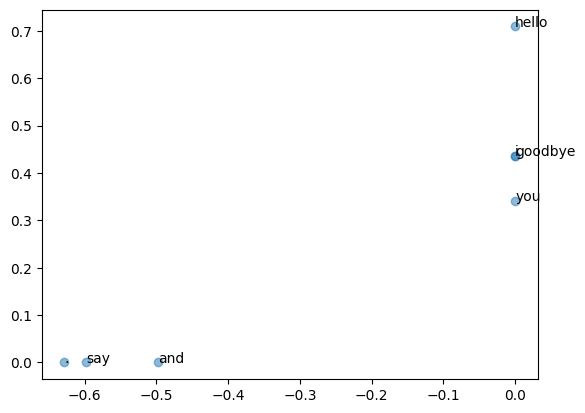

In [16]:
print(U[0, :2]) # 输出单词ID为0的单词的前两个U向量元素

for word, word_id in word_to_id.items():
    print(word, U[word_id, :2]) # 输出每个单词及其前两个U向量元素

# 绘制散点图
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1])) # 在散点图上标注单词

plt.scatter(U[:, 0], U[:, 1], alpha=0.5) # 绘制U矩阵的前两列作为x和y坐标的散点图，alpha表示透明度
plt.show() # 显示图形

观察该图可以发现，`goodbye` 和 `hello`、`you` 和 `i` 位置接近，这是比较符合我们的直觉的。但是，因为我们使用的语料库很小，有些结果就比较微妙。下面，我们将使用更大的 PTB 数据集进行相同的实验。首先，我们简单介绍一下 PTB 数据集。

如果矩阵大小是N，SVD的计算的复杂度将达到$O(N^3)$。这意味着SVD需要与N的立方成比例的计算量。因为现实中这样的计算量是做不到的，所以往往会使用Truncated SVD等更快的方法。Truncated SVD通过截去（truncated）奇异值较小的部分，从而实现高速化。下一节，作为另一个选择，我们将使用sklearn库的``Truncated SVD``。

## PTB数据集
到目前为止，我们使用了非常小的文本数据作为语料库。这里，我们将使用一个大小合适的“真正的”语料库——Penn Treebank 语料库（以下简称为 PTB）。

PTB语料库经常被用作评价提案方法的基准。本书中我们将使用PTB语料库进行各种实验。

我们使用的 PTB 语料库在 word2vec 的发明者托马斯・米科洛夫（Tomas Mikolov）的网页上有提供。这个 PTB 语料库是以文本文件的形式提供的，与原始的 PTB 的文章相比，多了若干预处理，包括将稀有单词替换成特殊字符 `<unk>`（unk 是 unknown 的简称），将具体的数字替换成 “N” 等。下面，我们将经过这些预处理之后的文本数据作为 PTB 语料库使用。作为参考，下图给出了 PTB 语料库的部分内容。

<img src="./fig/ptb_example.png" alt="ptb_example" style="display: block; margin: 0 auto;">

如图所示，在 PTB 语料库中，一行保存一个句子。在本书中，我们将所有句子连接起来，并将其视为一个大的时序数据。此时，在每个句子的结尾处插入一个特殊字符 `<eos>`（eos 是 end of sentence 的简称）。

本书不考虑句子的分割，将多个句子连接起来得到的内容视为一个大的时序数据。当然，也可以以句子为单位进行处理，比如，以句子为单位计算词频。不过，考虑到简单性，本书不进行以句子为单位的处理。

在本书中，为了方便使用 Penn Treebank 数据集，我们准备了专门的 Python 代码。这个文件在 `dataset/ptb.py` 中，并假定从章节目录使用。

In [17]:
import os, sys
sys.path.append(os.pardir) # 为了导入父目录中的dataset模块
import numpy as np
from dataset import ptb
from common.util import preprocess, create_co_matrix, ppmi

corpus, word_to_id, id_to_word = ptb.load_data('train') # 加载PTB数据集

print('corpus size:', len(corpus)) # 输出语料库大小
print('corpus[:30]:', corpus[:30]) # 输出语料库的前30个单词ID
print() 
print('id_to_word[0]:', id_to_word[0]) # 输出单词ID为0的单词
print('id_to_word[1]:', id_to_word[1]) # 输出单词ID为1的单词
print('id_to_word[2]:', id_to_word[2]) # 输出单词ID为2的单词
print()
print('word_to_id["car"]:', word_to_id['car']) # 输出单词'car'的ID
print('word_to_id["happy"]:', word_to_id['happy']) # 输出单词'happy'的ID
print('word_to_id["lexus"]:', word_to_id['lexus']) # 输出单词'lexus'的ID

corpus size: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id["car"]: 3856
word_to_id["happy"]: 4428
word_to_id["lexus"]: 7426


语料库的用法和之前一样。`corpus` 中保存了单词 ID 列表，`id_to_word` 是将单词 ID 转化为单词的字典，`word_to_id` 是将单词转化为单词 ID 的字典。

如上面的代码所示，使用 `ptb.load_data()` 加载数据。此时，指定参数 `'train'`、`'test'` 和 `'valid'` 中的一个，它们分别对应训练用数据、测试用数据和验证用数据中的一个。以上就是 `ptb.py` 文件的使用方法。

## 基于PTB数据集的评价
下面，我们将基于计数的方法应用于 PTB 数据集。这里建议使用更快速的 SVD 对大矩阵执行 SVD，为此我们需要安装 `sklearn` 模块。当然，虽然仍可以使用基本版的 SVD（`np.linalg.svd()`），但是这需要更多的时间和内存。我们把源代码一并给出，如下所示。

In [18]:
import sys
sys.path.append('..') # 为了导入父目录中的dataloader模块
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

window_size = 2 # 窗口大小
wordvec_size = 100 # 词向量的维度 

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id) # 词汇表大小
print('正在统计共现情况...')
C = create_co_matrix(corpus, vocab_size, window_size) # 构建共现矩阵
print('正在计算PPMI...')
W = ppmi(C, verbose=True) # 计算PPMI矩阵

print('正在计算SVD...')
try:
    # 快速SVD
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None) # 使用随机SVD进行分解，取前wordvec_size维，迭代5次，random_state表示随机种子
except ImportError:
    # 普通SVD
    U, S, V = np.linalg.svd(W) # 对PPMI矩阵进行SVD分解

word_vecs = U[:, :wordvec_size] # 取前wordvec_size维作为词向量

querys = ['you', 'year', 'car', 'toyota'] # 查询词列表
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5) # 查找与查询词最相似的单词

正在统计共现情况...
正在计算PPMI...


g:\计算机\python\深度学习进阶：自然语言处理\深度学习进阶：自然语言处理\ch02自然语言和单词的分布式表示\..\common\util.py:139: RuntimeWarning: overflow encountered in scalar multiply
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
g:\计算机\python\深度学习进阶：自然语言处理\深度学习进阶：自然语言处理\ch02自然语言和单词的分布式表示\..\common\util.py:139: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)


1.0% done
2.0% done
3.0% done
4.0% done
5.0% done
6.0% done
7.0% done
8.0% done
9.0% done
10.0% done
11.0% done
12.0% done
13.0% done
14.0% done
15.0% done
16.0% done
17.0% done
18.0% done
19.0% done
20.0% done
21.0% done
22.0% done
23.0% done
24.0% done
25.0% done
26.0% done
27.0% done
28.0% done
29.0% done
30.0% done
31.0% done
32.0% done
33.0% done
34.0% done
35.0% done
36.0% done
37.0% done
38.0% done
39.0% done
40.0% done
41.0% done
42.0% done
43.0% done
44.0% done
45.0% done
46.0% done
47.0% done
48.0% done
49.0% done
50.0% done
51.0% done
52.0% done
53.0% done
54.0% done
55.0% done
56.0% done
57.0% done
58.0% done
59.0% done
60.0% done
61.0% done
62.0% done
63.0% done
64.0% done
65.0% done
66.0% done
67.0% done
68.0% done
69.0% done
70.0% done
71.0% done
72.0% done
73.0% done
74.0% done
75.0% done
76.0% done
77.0% done
78.0% done
79.0% done
80.0% done
81.0% done
82.0% done
83.0% done
84.0% done
85.0% done
86.0% done
87.0% done
88.0% done
89.0% done
90.0% done
91.0% done
92.0% do

这里，为了执行 SVD，我们使用了 `sklearn` 的 `randomized_svd()` 方法。该方法通过使用了随机数的 Truncated SVD，仅对奇异值较大的部分进行计算，计算速度比常规的 SVD 快。剩余的代码和之前使用小语料库时的代码差不太多。执行代码，可以得以下结果（因为使用了随机数，所以在使用 Truncated SVD 的情况下，每次的结果都不一样）。

观察结果可知，首先，对于查询词 `you`，可以看到 `i`、`we` 等人称代词排在前面，这些都是在语法上具有相同用法的词。再者，查询词 `year` 有 `month`、`quarter` 等近义词，查询词 `car` 有 `auto`、`vehicle` 等近义词。此外，将 `toyota` 作为查询词时，出现了 `nissan`、`honda` 和 `lexus` 等汽车制造商名或者品牌名。像这样，在含义或语法上相似的单词表示为相近的向量，这符合我们的直觉。

我们终于成功地将单词含义编码成了向量，真是可喜可贺！使用语料库，计算上下文中的单词数量，将它们转化 PPMI 矩阵，再基于 SVD 降维获得好的单词向量。这就是单词的分布式表示，每个单词表示为固定长度的密集向量。

在本章的实验中，我们只看了一部分单词的近义词，但是可以确认许多其他的单词也有这样的性质。期待使用更大的语料库可以获得更好的单词的分布式表示！

## 小结 
- 使用 WordNet 等同义词词典，可以获取近义词或测量单词间的相似度等
- 使用同义词词典的方法存在创建词库需要大量人力、新词难更新等问题
- 目前，使用语料库对单词进行向量化是主流方法
- 近年来的单词向量化方法大多基于“单词含义由其周围的单词构成”这一分布式假设
- 在基于计数的方法中，对语料库中的每个单词周围的单词的出现频数进行计数并汇总（= 共现矩阵）
- 通过将共现矩阵转化为 PPMI 矩阵并降维，可以将大的稀疏向量转变为小的密集向量
- 在单词的向量空间中，含义上接近的单词距离上理应也更近